# <center>Laboratorium 3<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

Biblioteki niezbędne do wykonania zadania:

(instalacja: "pip install numpy scipy matplotlib memory_profiler")

In [17]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import numbers
import math
import random

!pip install memory_profiler
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


***Materiały przygotowujące:***
- Standard IEEE 754 [PL](https://pl.wikipedia.org/wiki/IEEE_754) [EN](https://en.wikipedia.org/wiki/IEEE_754)
- Liczba zmiennoprzecinkowa [PL](https://pl.wikipedia.org/wiki/Liczba_zmiennoprzecinkowa) [EN](https://en.wikipedia.org/wiki/Floating-point_arithmetic)
- Arytmetyka zmiennoprzecinkowa [Python](https://docs.python.org/3.7/tutorial/floatingpoint.html)

***Profilowanie kodu:***
- [timeit](https://docs.python.org/2/library/timeit.html) - profilowanie czasu wykonywania kodu 
- [memit](https://pypi.org/project/memory-profiler/) - profilowanie pamięci zużywanej przez kod

Zarówno timeit jak i memit wspierają magic command w Jupyter notebook, co obrazuje poniższy przykład:

In [2]:
def func(size):
    a = np.random.random((size,size))
    b = np.random.random((size,size))
    c = a + b
    return c

for size in [100, 1000, 10000]:
    print('SIZE: ', size)
    print('Timing: ')
    saved_timing = %timeit -r 5 -n 10 -o func(size)
    saved_timing.average   # średni czas próby
    saved_timing.stdev     # odchylenie standardowe
    print('Memory usage: ')
    %memit func(size)
    print('\n')

SIZE:  100
Timing: 
346 µs ± 73.1 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 78.95 MiB, increment: 0.40 MiB


SIZE:  1000
Timing: 
28.6 ms ± 1.34 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 93.92 MiB, increment: 14.88 MiB


SIZE:  10000
Timing: 
2.92 s ± 51.2 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 2279.29 MiB, increment: 2200.30 MiB




***Zadanie 1.***  
Zaimplementuj funkcje obliczające błąd względny i bezwzględny (*relative_error* i *absolut_error*).
Funkcje przyjmują 2 argumenty: wartość dokładną oraz wartość przybliżoną, zwracając wartość błędu.
Implementacja powinna obsługiwać zarówno wartości skalarne, listy oraz wektory i macierze typu np.array z zachowaniem zasad [broadcastingu](https://numpy.org/doc/stable/user/basics.broadcasting.html).

**Wskazówka** Wykorzystuj funkcje *relative_error* i *absolut_error* w dalszej części laboratorium do analizy błędów.

***Zadanie 2.***  
Zaimplementuj funkcje *p_diff*, która przyjmuje jako parametry wartości całkowite $n$ i rzeczywiste $c$ oraz zwraca różnicę (co do wartości bezwzględnej)   dwóch wyrażeń $P_1$ oraz $P_2$:  
  
a) $P_1 = b - b + c $  
b) $P_2 = b + c - b $  
  
gdzie $b = 2^n$

Analizując różnicę w otrzymanych wynikach zastosuj warotści:  
- $n \in \{1,2,3... 50\}$
- $c \in \{0.1, 0.125, 0.25, 0.33, 0.5, 0.6\}$
 
Następnie odpowiedź i zilustruj wykresami pytania:

1. Jaki wynik powinniśmy otrzymać?
2. Które z liczb mają skończoną a które nieskończoną reprezentację?    
3. Dlaczego wyniki się od siebie różnią?    
4. Jaki typ błędu tutaj występuje?
5. Czy istnieje możliwość poprawy działania tych wyrażeń, jeżeli tak to w jaki sposób?  


In [3]:
c = [0.1, 0.125, 0.25, 0.33, 0.5, 0.6]
for x in range(len(c)):
    n = random.randint(1,50)
    print(f"Dla n = {n}, c = {c[x]} wynik wynosi {main.p_diff(n, c[x])}")
    

    
# Zad1. We wszystkich przypadkach wynik powinien wynieść 0, a ja otrzymałem 3 wyniki niezerowe, ale bardzo małe.
# Zad2. Nieskończoną reprezentację posiadają liczby niebędące ujemną potęgą dwójki, u nas w zadaniu odpowiednio: 0.1 , 0.33 , 0.6.
# Zad3. Wyniki różnią się od siebie, ponieważ ilość bitów do zapisania danej liczby jest ograniczona.
# Zad4. W tym zadaniu występuję błąd reprezentacji.
# Zad5. Błędy te można zniwelować bądź zmniejszyć poprzez umiejętne stosowanie sposobu i kolejności wykonywanych działań.

Dla n = 2, c = 0.1 wynik wynosi 3.608224830031759e-16
Dla n = 34, c = 0.125 wynik wynosi 0.0
Dla n = 42, c = 0.25 wynik wynosi 0.0
Dla n = 19, c = 0.33 wynik wynosi 4.190953140081888e-11
Dla n = 43, c = 0.5 wynik wynosi 0.0
Dla n = 41, c = 0.6 wynik wynosi 9.76562500000222e-05


***Zadanie 3.***  
Wartości funkcji $\mathrm{e}^{x}$ można obliczyć w przybliżeniu z szeregu Taylora w następujący sposób:  
  
$\mathrm{e}^{x} \approx \sum\limits_{i=0}^{N}{\cfrac{1}{i!}x^{i}}$ 
  
na podstawie przedstawionych informacji zaimplementuj funkcje *exponential* która oblicza $\mathrm{e}^{x}$ z zadaną dokładnością $N$. Porównaj działanie utworzonej funkcji z [numpy.exp](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.exp.html). Odpowiedz na pytania:  

1. Jaki typ błędu obrazuje omawiany przykład?
2. Dokonaj analizy błędów bezwzględnych i względnych w zależności od wartości $n$.

In [4]:
x = 7
n = 13
while n < 19:
    #print(f'Dla n = {n} e_power_x = {main.exponential(5,n):.10f}, a e_x_np = {np.exp(x)}')
    print(f'Różnica między wynikami dla n = {n} wynosi: błąd względny: {main.relative_error(main.exponential(x, n), np.exp(x))}, a błąd bezwględny: {main.absolut_error(main.exponential(x, n), np.exp(x))}')
    n += 1


# Zad1. Typ błędu występującego w tym przykładzie to błąd obięcia.
# Zad2. Wraz ze wzrostem wartości N maleją wartości błedu względnego i bezwględnego

Różnica między wynikami dla n = 13 wynosi: błąd względny: 0.02774898986438711, a błąd bezwględny: 29.608846808205044
Różnica między wynikami dla n = 14 wynosi: błąd względny: 0.01297765463461131, a błąd bezwględny: 14.049398153882294
Różnica między wynikami dla n = 15 wynosi: błąd względny: 0.0057500768461729605, a błąd bezwględny: 6.269673826720918
Różnica między wynikami dla n = 16 wynosi: błąd względny: 0.0024123859480109215, a błąd bezwględny: 2.6391358073790343
Różnica między wynikami dla n = 17 wynosi: błąd względny: 0.0009591021544498921, a błąd bezwględny: 1.0507754239170026
Różnica między wynikami dla n = 18 wynosi: błąd względny: 0.00036191525186448194, a błąd bezwględny: 0.3967446777855912


***Zadania 4.***  
Zaimplementuj 2 funkcje $coskx1$ i $coskx2$, realizujące rekurencyjnie przybliżanie wartości $cos(kx)$ w następujący sposób:

- Metoda 1:         
$cos(m+1)x = 2cosx \cdot cos(mx) - cos(m-1)x$
- Metoda 2:     
$cos(mx) = cosx \cdot cos(m-1)x - sinx \cdot sin(m-1)x$       
$sin(mx) = sinx \cdot cos(m-1)x + cosx \cdot sin(m-1)x$

Następnie przeanalizuj otrzymane rezultaty dla różnych $k$.

**Wskazówka** Do wyliczenia wartości $sin(x)$, $cos(x)$ (dla $k=1$) można użyć funkcji biblioteki numpy. 
Pozostałe wartości dla $k>1$ należy wyznaczyć rekurencyjnie.

In [5]:
k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
x = np.pi / 3
for el in k:
        print(f" W metodzie 1. dla k = {el} cos( {el}*{x}) = {main.coskx1(el, x)}")
for el in k:
        print(f" W metodzie 2. dla k = {el} cos( {el}*{x} i sin({el}*{x}) wynoszą : = {main.coskx2(el, x)}")
        
        
# Wraz ze wzrostem wartości k i zarazem wykonania większej ilości obliczeń wyniki różnią się w obu metodach. Jest to spowodowane błędem przybliżenia
    

 W metodzie 1. dla k = 1 cos( 1*1.0471975511965976) = 0.5000000000000001
 W metodzie 1. dla k = 2 cos( 2*1.0471975511965976) = -0.4999999999999998
 W metodzie 1. dla k = 3 cos( 3*1.0471975511965976) = -1.0
 W metodzie 1. dla k = 4 cos( 4*1.0471975511965976) = -0.5000000000000004
 W metodzie 1. dla k = 5 cos( 5*1.0471975511965976) = 0.49999999999999944
 W metodzie 1. dla k = 6 cos( 6*1.0471975511965976) = 1.0
 W metodzie 1. dla k = 7 cos( 7*1.0471975511965976) = 0.5000000000000008
 W metodzie 1. dla k = 8 cos( 8*1.0471975511965976) = -0.4999999999999991
 W metodzie 1. dla k = 9 cos( 9*1.0471975511965976) = -1.0
 W metodzie 1. dla k = 10 cos( 10*1.0471975511965976) = -0.5000000000000011
 W metodzie 1. dla k = 11 cos( 11*1.0471975511965976) = 0.4999999999999988
 W metodzie 1. dla k = 12 cos( 12*1.0471975511965976) = 1.0
 W metodzie 2. dla k = 1 cos( 1*1.0471975511965976 i sin(1*1.0471975511965976) wynoszą : = (0.5000000000000001, 0.8660254037844386)
 W metodzie 2. dla k = 2 cos( 2*1.04719

***Zadanie 5.***  
Wiedząc, że
$\begin{aligned}
\sum_{n=1}^{\infty} \cfrac{1}{n^2} = \cfrac{1}{6} \pi^2
\end{aligned}$,
napisz kod w Pythonie (funkcja *pi*) obliczający przybliżenie liczby pi (nie korzystaj ze stałych <i>numpy.pi</i>, <i>math.pi</i> itp.). 

1. Z jakimi rodzajami błędów numerycznych mamy tu do czynienia? 
2. Sporządź wykresy błędów bezwzględnych i względnych w stosunku do stałej numpy.pi w zależności od wartości $n$.  

**Wskazówka** Do wizualizacji wyników użyj skali logarytmicznej.

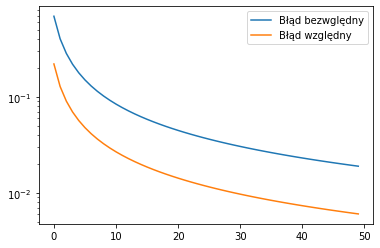

In [7]:
absolut_error = np.zeros(50)
relative_error = np.zeros(50)

for i in range(50):
    absolut_error[i] = main.absolut_error(np.pi, main.pi(i + 1))
    relative_error[i] = main.relative_error(np.pi, main.pi(i + 1))

plt.semilogy(absolut_error)
plt.semilogy(relative_error)
plt.legend(["Błąd bezwględny", "Błąd względny"])
plt.show()

#Zad1 W tym zadaniu występują błędy obięcia oraz błęy przybliżenia 

***Zadanie 6.***  
Używając funkcji timeit oraz memit zbadaj czas działania oraz zużycie pamięci funkcji z Zadania 4 w zalożności od różnych wartości $n$.     
Sporządź wykresy:
- czasu obliczenia danego przybliżenia liczby pi w zależności od $n$. 
W tym celu wykorzystaj funkcje [errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) oraz zwracane przez *timeit* wartości średnie oraz ich odchylenie standardowe. 
- błędu bezwzględnego przybliżenia liczby pi od czasu jego wykonania.



**Wskazówka** Użyj opcji -o (output) dla *timeit* aby zapisać wynik do zmiennej. Opcje -r (runs) i -n (ilość pentli) decydują o ilości wykonanych prób.     
Do wizualizacji wyników użyj skali logarytmicznej.

1.56 µs ± 419 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
7.74 µs ± 1.4 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
6.95 µs ± 1.36 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
9.52 µs ± 1.24 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
10.3 µs ± 1.47 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
5.34 µs ± 1.13 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
5.69 µs ± 1.07 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
5.94 µs ± 995 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
6.25 µs ± 793 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
7.68 µs ± 1.44 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
6.84 µs ± 921 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
9.59 µs ± 1.82 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
9.05 µs ± 932 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
9.24 µs ± 988 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
9.8 µs ± 1.78

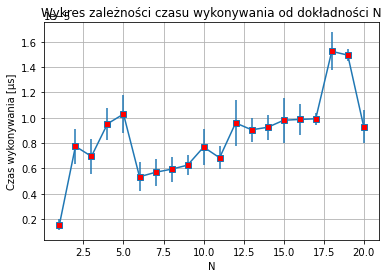

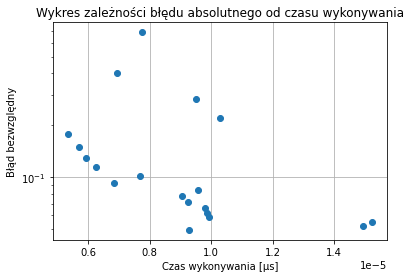

In [19]:
time = np.zeros(20)
stdev = np.zeros(20)
absolute_error = np.zeros(20)


for i in range(20):
    saved_timing = %timeit -r 5 -n 10 -o main.pi(i)
    time[i] = saved_timing.average
    stdev[i] = saved_timing.stdev
    absolute_error[i] = main.absolut_error(main.pi(i), np.pi)
    
i = np.linspace(1, 20, 20)
yerr = stdev
plt.errorbar(i, time, yerr , marker = 's', mfc = 'red')
plt.title("Wykres zależności czasu wykonywania od dokładności N")
plt.xlabel("N")
plt.ylabel("Czas wykonywania [µs]")
plt.grid()
plt.show()

plt.semilogy(time, absolute_error, "o")
plt.title("Wykres zależności błędu absolutnego od czasu wykonywania")
plt.xlabel("Czas wykonywania [µs]")
plt.ylabel("Błąd bezwzględny")
plt.grid()
plt.show()


